Presentation theme: Your target audience is non-technical people interested in using your findings to maximize their profit when selling their home.

- figure out 3 questions:
    - figure out the important features and the ones we should drop
    - figure out the sentiment of value and year built. Are there any historical value attached to house prices
    - how much in average is the difference between houses with waterfronts and houses without
    - which area in kings county / zipcode price map
    - time series of of house prices (based only on important variable)
- clean data & feature engineering
    - duplicates
    - find missing values
    - find odd values (too high / negative values)
    - find outliers values (figure out what to do with them)
    - do we need to change datatype of any columns? to date? to int64
    - do we need to encode any categorical data?
    - any new variabes we can create or combine
- visualization & basic stats
    - use correlation matrix (use np.triangle etc)
- linear regression - multiple
    - plot the coefficients in a graph
    - identify how adding each coefficient improves the R2
    - pick out the highest coefficients and plot simple regression / use reg coef to identify deeper to above ques
- understand the output of statsmodel


Questions
* "How did you pick the question(s) that you did?"
* "Why are these questions important from a business perspective?"
* "How did you decide on the data cleaning options you performed?"
* "Why did you choose a given method or library?"
* "Why did you select those visualizations and what did you learn from each of them?"
* "Why did you pick those features as predictors?"
* "How would you interpret the results?"
* "How confident are you in the predictive quality of the results?"
* "What are some of the things that could cause the results to be wrong?"

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [118]:
# importing data
url = 'https://raw.githubusercontent.com/Ftan91/Project-1---Kings-County-House-Dataset/master/kc_house_data.csv'
df = pd.read_csv(url, parse_dates = ['date'])

In [122]:
# check first 5 rows of dataset
display (df.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


data issues encountered:
Missing Data
    - waterfront / view / yr_renovated

Outliers

Incorrect data type
    - sqft_basement: treated as text as oppose to int64 / float64
    

In [112]:
# sanity check for any duplicates
df = df.drop_duplicates(subset = 'id')
print ('Number of rows before: 21597')
print ('Number of rows after dropping duplicates: {}'.format(df.shape[0]))
print ('Total number of rows dropped: {}'.format(21597 - df.shape[0]))

Number of rows before: 21597
Number of rows after dropping duplicates: 21420
Total number of rows dropped: 177


In [123]:
# check for missing values, multiple data entries for each column, negative values and 
isnull = df.isnull().sum().sort_values(ascending = False)

for column in isnull.index:
    print ('Column name: {}'.format(column))
    print ('Number of null entries: {}'.format(df[column].isnull().sum()))
    print ('Number of unique datatype entries: {}'.format(df[column].apply(type).nunique()))
    print ('Data entry type: {}'.format(df[column].apply(type).unique()))
    print ('Min: {}, Max: {}'.format(df[column].min(), format(df[column].max())))
    print ('\n')

Column name: yr_renovated
Number of null entries: 3842
Number of unique datatype entries: 1
Data entry type: [<class 'float'>]
Min: 0.0, Max: 2015.0


Column name: waterfront
Number of null entries: 2376
Number of unique datatype entries: 1
Data entry type: [<class 'float'>]
Min: 0.0, Max: 1.0


Column name: view
Number of null entries: 63
Number of unique datatype entries: 1
Data entry type: [<class 'float'>]
Min: 0.0, Max: 4.0


Column name: sqft_lot15
Number of null entries: 0
Number of unique datatype entries: 1
Data entry type: [<class 'int'>]
Min: 651, Max: 871200


Column name: date
Number of null entries: 0
Number of unique datatype entries: 1
Data entry type: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Min: 2014-05-02 00:00:00, Max: 2015-05-27 00:00:00


Column name: price
Number of null entries: 0
Number of unique datatype entries: 1
Data entry type: [<class 'float'>]
Min: 78000.0, Max: 7700000.0


Column name: bedrooms
Number of null entries: 0
Number of unique data

In [133]:
df[df['sqft_basement'] == '?']['sqft_basement'].count()

454

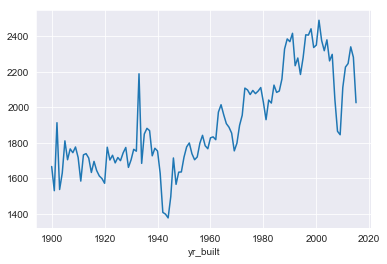

In [27]:
x = df.groupby('yr_built')['price'].mean()
y = df.groupby('yr_built')['sqft_living15'].mean()
y.plot()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 